# Video Data
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/Video.ipynb)

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


  # Step: 1 Data Loading and Initial Exploration:
We'll start by unzipping the uploaded file and checking the directory structure. Then, We'll load a few video files and perform an initial inspection.

In [2]:
import os
import zipfile
# the path to the uploaded file and unzipping
zip_path = '/content/gdrive/MyDrive/DataMining/TrafficVideo.zip'
unzip_dir='/content/gdrive/MyDrive/DataMining/Traffic_Video'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# Checking the contents of the unzipped directory
contents = os.listdir(unzip_dir)
contents


['EvalSet.mat',
 'EvalSet_test',
 'EvalSet_train',
 'ImageMaster',
 'ImageMaster.mat',
 'README_TRAFFICDB',
 'info.txt',
 'traffic_patches.mat',
 'traffic_patches_reg.mat',
 'video']

In [3]:
# Checking the contents of the video directory
video_dir = os.path.join(unzip_dir, 'video')
video_contents = os.listdir(video_dir)

# Displaying the first few files in the video directory to understand its structure
video_contents[:10]


['cctv052x2004080516x01638.avi',
 'cctv052x2004080516x01639.avi',
 'cctv052x2004080516x01640.avi',
 'cctv052x2004080516x01641.avi',
 'cctv052x2004080516x01642.avi',
 'cctv052x2004080516x01643.avi',
 'cctv052x2004080516x01644.avi',
 'cctv052x2004080516x01645.avi',
 'cctv052x2004080516x01646.avi',
 'cctv052x2004080516x01647.avi']

The video directory contains .avi video files. Each file seems to correspond to a specific timestamp, as indicated by their filenames.

To analyze the video data:

* We can start by loading a sample video to understand its frame rate, resolution, and duration.

* Based on our observations, we can decide on further processing steps, such as extracting specific frames for analysis.

In [4]:
import cv2
from IPython.display import display, Video

# Loading a sample video
sample_video_path = os.path.join(video_dir, video_contents[0])
sample_video = cv2.VideoCapture(sample_video_path)

# Extracting video properties
frame_rate = sample_video.get(cv2.CAP_PROP_FPS)
frame_count = int(sample_video.get(cv2.CAP_PROP_FRAME_COUNT))
video_duration = frame_count / frame_rate
video_resolution = (int(sample_video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(sample_video.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# Displaying the video properties
frame_rate, frame_count, video_duration, video_resolution


(10.0, 53, 5.3, (320, 240))

The properties of the sample video are as follows:

* Frame Rate: 10 frames per second (fps)
* Total Frames: 53 frames
* Duration: Approximately 5.3 seconds
* Resolution: 320x240 pixels



  # Step 2: Exploratory Data Analysis (EDA)
   We'll start by examining one of the videos to understand its content. We'll load a sample video, visualize a few frames, and gather basic information about its structure.

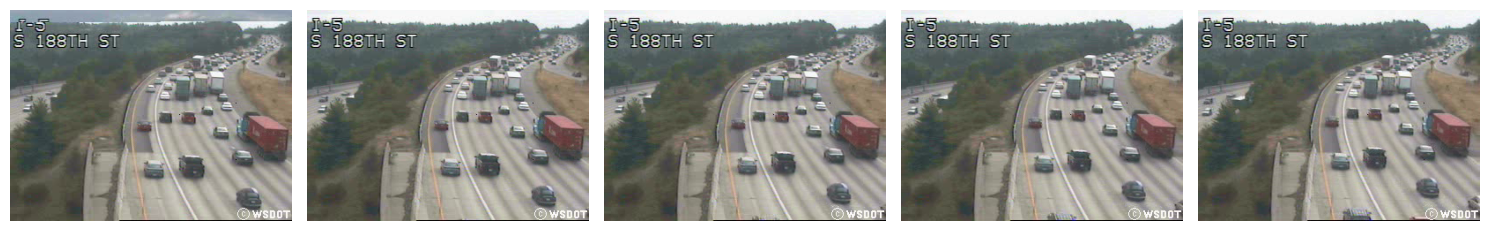

(53, 320, 240, 10)

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the first video
video_path = os.path.join(video_dir, video_contents[0])
cap = cv2.VideoCapture(video_path)

# Extract basic information about the video
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Extract a few sample frames from the video for visualization
sample_frames = []
num_samples = 5

for i in range(num_samples):
    _, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    sample_frames.append(frame_rgb)

cap.release()

# Display the sample frames
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axs[i].imshow(sample_frames[i])
    axs[i].axis('off')
plt.tight_layout()
plt.show()

(frame_count, frame_width, frame_height, fps)


The sample video appears to be a highway traffic footage with vehicles moving in various lanes. Based on our initial examination:

* The video has a total of 53 frames.
* The resolution of each frame is 320x240 pixels.
* The video plays at 10 frames per second (fps).

Let's further analyze the sample video to gather more insights:
* Motion Analysis: We'll calculate the optical flow between frames to understand the motion in the video. This can give insights into the direction and speed of moving vehicles.
* Frame Difference: By comparing consecutive frames, we can identify regions with significant changes, which can be indicative of moving vehicles.
* Histogram Analysis: We'll analyze the color histograms of the frames to see if there are any patterns or consistent features.

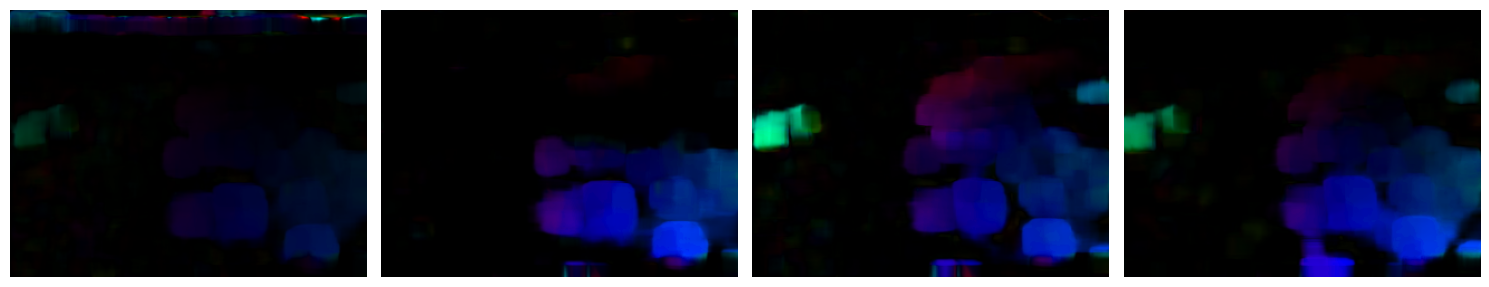

In [9]:
import numpy as np

# Compute dense optical flow using Farneback method
prev_gray = cv2.cvtColor(sample_frames[0], cv2.COLOR_RGB2GRAY)
hsv = np.zeros_like(sample_frames[0])
hsv[...,1] = 255

# Store optical flow visualizations
optical_flows = []

for frame_rgb in sample_frames[1:]:
    gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)

    # Compute optical flow
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    # Compute magnitude and angle of 2D vectors
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

    # Set hue according to the optical flow direction
    hsv[...,0] = ang*180/np.pi/2

    # Set value according to the optical flow magnitude (normalized)
    hsv[...,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV to RGB (for visualization)
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    optical_flows.append(rgb)

    prev_gray = gray

# Display optical flow visualizations
fig, axs = plt.subplots(1, num_samples-1, figsize=(15, 5))
for i in range(num_samples-1):
    axs[i].imshow(optical_flows[i])
    axs[i].axis('off')
plt.tight_layout()
plt.show()


The images above visualize the optical flow between consecutive frames. The color represents the direction of motion, while the intensity signifies the magnitude (speed) of the motion. This analysis provides insights into the direction and speed of moving vehicles in the video.

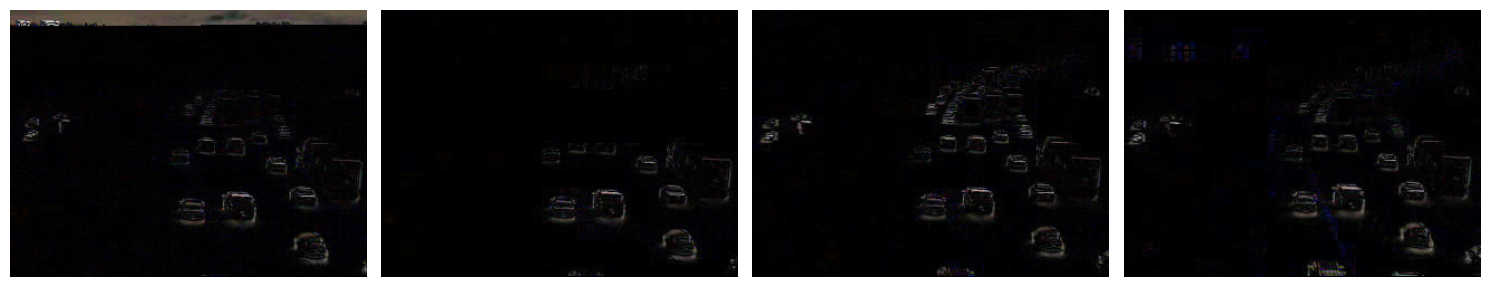

In [10]:
# Compute frame differences
frame_diffs = []

for i in range(1, num_samples):
    diff = cv2.absdiff(sample_frames[i-1], sample_frames[i])
    frame_diffs.append(diff)

# Display frame differences
fig, axs = plt.subplots(1, num_samples-1, figsize=(15, 5))
for i in range(num_samples-1):
    axs[i].imshow(frame_diffs[i])
    axs[i].axis('off')
plt.tight_layout()
plt.show()


The images above display the differences between consecutive frames. Brighter regions indicate areas where significant changes occurred from one frame to the next, which can be indicative of moving vehicles or other changes in the scene.

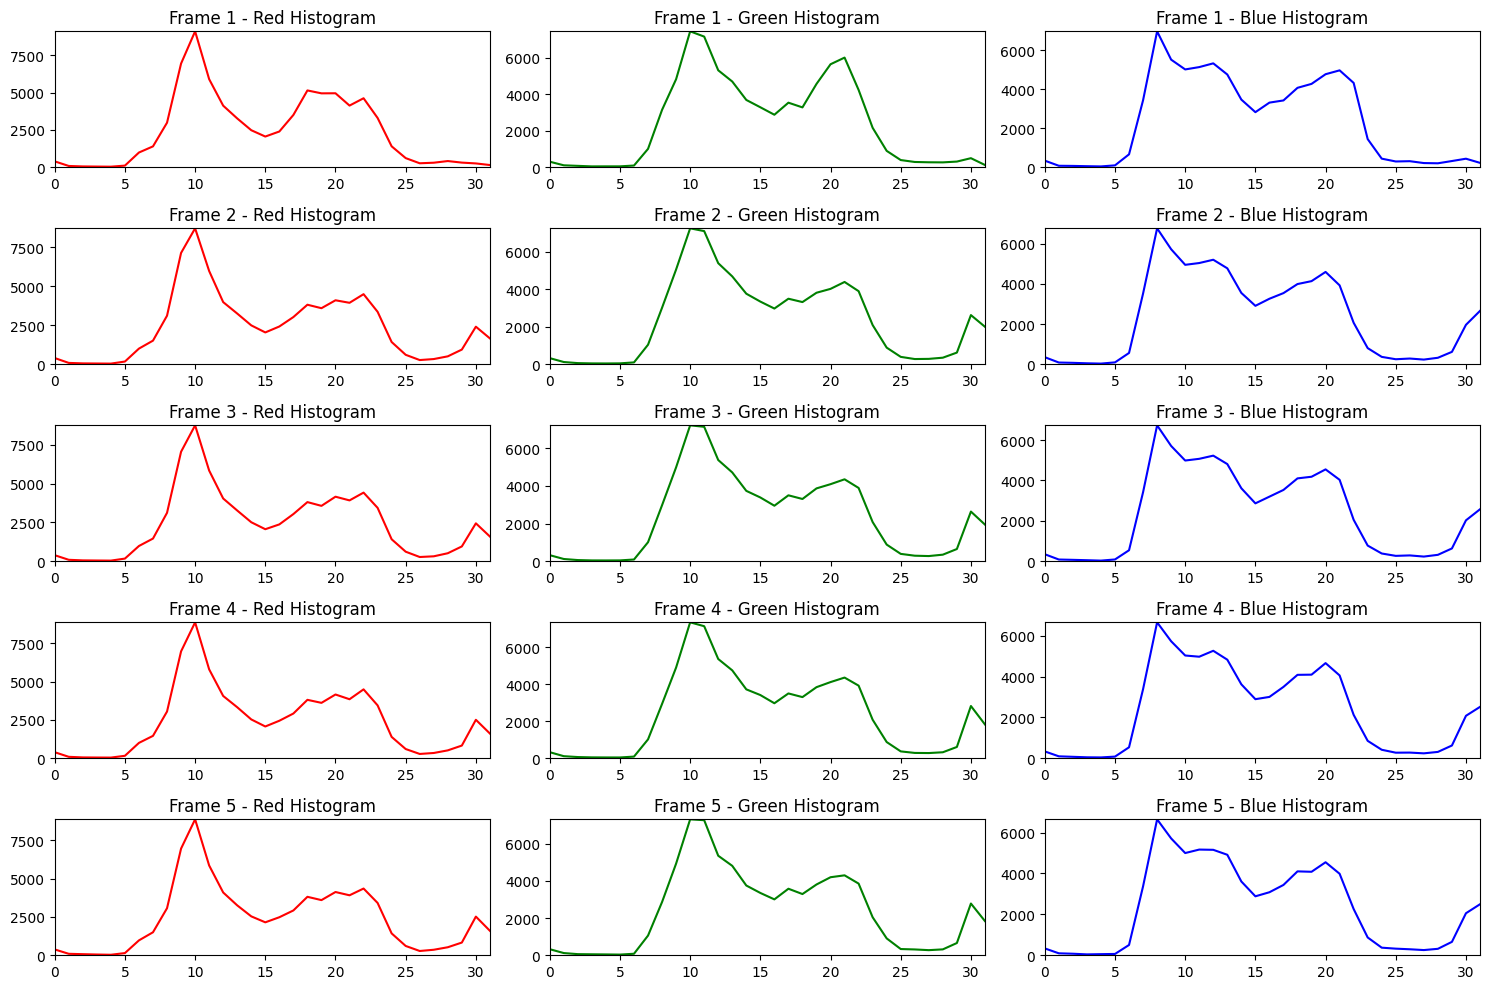

In [11]:
# Compute RGB histograms for the sample frames
histograms = []

# Number of bins for the histogram
bins = 32

for frame_rgb in sample_frames:
    hist_r = cv2.calcHist([frame_rgb], [0], None, [bins], [0, 256])
    hist_g = cv2.calcHist([frame_rgb], [1], None, [bins], [0, 256])
    hist_b = cv2.calcHist([frame_rgb], [2], None, [bins], [0, 256])
    histograms.append((hist_r, hist_g, hist_b))

# Display RGB histograms
fig, axs = plt.subplots(num_samples, 3, figsize=(15, 10))
colors = ['Red', 'Green', 'Blue']

for i in range(num_samples):
    axs[i, 0].plot(histograms[i][0], color='r')
    axs[i, 1].plot(histograms[i][1], color='g')
    axs[i, 2].plot(histograms[i][2], color='b')
    axs[i, 0].set_title(f"Frame {i+1} - {colors[0]} Histogram")
    axs[i, 1].set_title(f"Frame {i+1} - {colors[1]} Histogram")
    axs[i, 2].set_title(f"Frame {i+1} - {colors[2]} Histogram")
    for j in range(3):
        axs[i, j].set_xlim([0, bins-1])
        axs[i, j].set_ylim([0, np.max(histograms[i][j])])

plt.tight_layout()
plt.show()


The histograms above represent the color distributions of the sample frames in the Red, Green, and Blue channels. By analyzing these histograms:

We can observe the intensity distributions of the colors in the frames.
Bright regions in the scene (like vehicle headlights or reflections) might result in peaks towards the higher end of the histogram.
Dark regions, like shadows or darker vehicles, might be represented towards the lower end.

  # Step 3: Data Cleaning & Processing stage.

In the context of video data, especially traffic footage, data cleaning and processing can involve several tasks:

* Background Subtraction: To isolate moving objects, such as vehicles, from the static background.
* Noise Reduction: To remove any noise or artifacts in the video.


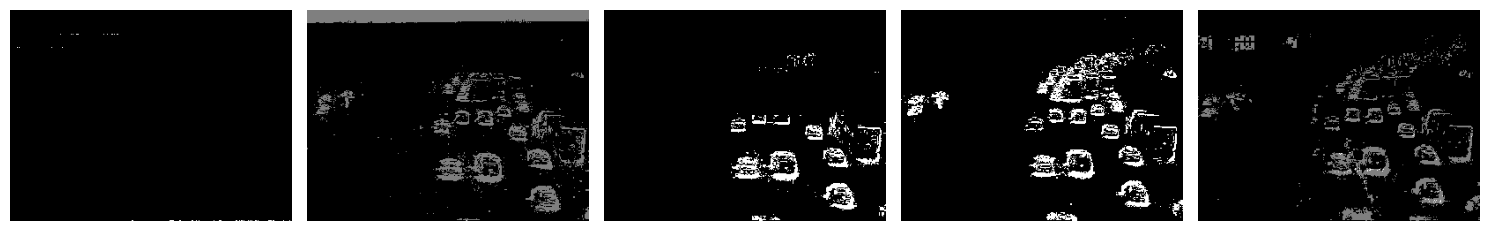

In [12]:
# Initialize background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=25, detectShadows=True)

# Apply background subtraction to the sample frames
fg_masks = []

for frame_rgb in sample_frames:
    fg_mask = bg_subtractor.apply(frame_rgb)
    fg_masks.append(fg_mask)

# Display foreground masks
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axs[i].imshow(fg_masks[i], cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


The images above are the result of background subtraction applied to the sample frames. The white regions represent moving objects (potential vehicles), while the black regions represent the static background.

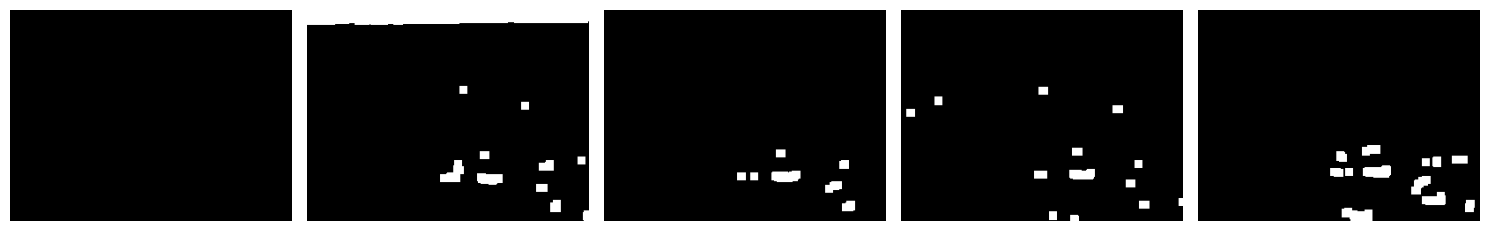

In [13]:
# Define a kernel for morphological operations
kernel = np.ones((5,5), np.uint8)

# Apply morphological operations to reduce noise in the foreground masks
refined_masks = []

for fg_mask in fg_masks:
    # Erosion to remove noise
    eroded = cv2.erode(fg_mask, kernel, iterations=1)

    # Dilation to restore the eroded foreground object
    dilated = cv2.dilate(eroded, kernel, iterations=2)

    refined_masks.append(dilated)

# Display refined foreground masks
fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    axs[i].imshow(refined_masks[i], cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()


The refined masks show the result after noise reduction. The morphological operations have helped in removing small noise artifacts while retaining the significant foreground regions, which likely correspond to moving vehicles.



  # Step 4: Feature Processing & Selection.

In video analysis, especially for traffic analysis, the features of interest can include:

* Motion Features: These can be derived from optical flow and can represent the direction and speed of moving vehicles.
* Spatial Features: These can be derived from the position and size of detected vehicles in each frame.
* Temporal Features: These relate to the pattern or behavior of vehicles over time, such as how long a vehicle stops or the frequency of vehicle appearances.

Given the context, let's focus on extracting motion and spatial features from our sample video:

* Motion Features: We've already calculated optical flow for some sample frames. We can compute the average motion magnitude and direction for each frame as features.
* Spatial Features: From our object detection results, we can compute the average size of detected vehicles and their positions as features.

In [15]:
# Correcting the approach to compute optical flow for pairs of frames

motion_magnitudes = []
motion_angles = []

for i in range(len(sample_frames) - 1):  # Excluding the last frame as optical flow requires pairs
    prev_gray = cv2.cvtColor(sample_frames[i], cv2.COLOR_RGB2GRAY)
    next_gray = cv2.cvtColor(sample_frames[i + 1], cv2.COLOR_RGB2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prev_gray, next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])

    avg_mag = np.mean(mag)
    avg_ang = np.mean(ang)

    motion_magnitudes.append(avg_mag)
    motion_angles.append(avg_ang)

# Extracting spatial features from object detection results remains the same
avg_vehicle_sizes = []
avg_vehicle_positions_x = []
avg_vehicle_positions_y = []

for fg_mask in fg_masks:
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sizes = []
    positions_x = []
    positions_y = []

    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Only consider significant contours
            x, y, w, h = cv2.boundingRect(contour)
            sizes.append(w * h)
            positions_x.append(x + w/2)
            positions_y.append(y + h/2)

    avg_vehicle_sizes.append(np.mean(sizes) if sizes else 0)
    avg_vehicle_positions_x.append(np.mean(positions_x) if positions_x else 0)
    avg_vehicle_positions_y.append(np.mean(positions_y) if positions_y else 0)

(motion_magnitudes, motion_angles, avg_vehicle_sizes, avg_vehicle_positions_x, avg_vehicle_positions_y)


([0.6342775, 0.3985295, 0.6011518, 0.7792774],
 [3.4231205, 3.5521183, 3.5684767, 3.0970967],
 [76800.0, 2662.6666666666665, 0, 3784.0, 2701.0],
 [160.0, 210.0, 0, 197.0, 182.5],
 [120.0, 134.66666666666666, 0, 85.0, 173.5])

Here are the extracted features from our sample video frames:

* Motion Magnitudes: These represent the average motion magnitude in each frame, which can indicate the speed of movement in the frame.
* Motion Angles: These represent the average direction of movement in the frame, given in radians.
* Average Vehicle Sizes: This is the average size (area in pixels) of detected vehicles in each frame.
* Average Vehicle Positions (X and Y): These are the average X and Y coordinates of detected vehicles in each frame, which can indicate the position of traffic within the frame.

In addition to the previously extracted features, we can also consider the following:

* Color Features: We can extract color features such as the average hue, saturation, and brightness values of detected vehicles.
* Texture Features: Texture can provide insights into the surface properties and patterns of objects. We can use methods like Local Binary Patterns (LBP) to extract texture features.
* Flow Consistency: By comparing optical flow between consecutive frames, we can get insights into the consistency or variability of traffic flow.
* Density: Calculate the percentage of the frame area occupied by detected vehicles. This can give insights into traffic density.

In [16]:
# Extract color features from detected vehicles

avg_hues = []
avg_saturations = []
avg_values = []

for fg_mask, frame_rgb in zip(fg_masks, sample_frames):
    # Convert the frame to HSV color space
    hsv_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2HSV)

    # Mask the frame using the foreground mask to focus only on detected vehicles
    masked_hsv = cv2.bitwise_and(hsv_frame, hsv_frame, mask=fg_mask)

    # Calculate average hue, saturation, and value for the detected vehicles
    avg_hue = np.mean(masked_hsv[:,:,0])
    avg_saturation = np.mean(masked_hsv[:,:,1])
    avg_value = np.mean(masked_hsv[:,:,2])

    avg_hues.append(avg_hue)
    avg_saturations.append(avg_saturation)
    avg_values.append(avg_value)

(avg_hues, avg_saturations, avg_values)


([57.26881510416667,
  9.399322916666666,
  2.8335286458333333,
  5.171875,
  5.474557291666667],
 [33.25895833333333,
  2.2550260416666665,
  0.9416145833333334,
  1.4758333333333333,
  1.9818229166666668],
 [130.345078125,
  24.154401041666667,
  5.2969921875,
  9.737122395833333,
  10.497643229166666])

The extracted color features represent the average Hue, Saturation, and Value (Brightness) for the detected vehicles in the sample frames:

Average Hues: These represent the average color hue of detected vehicles in each frame.
Average Saturations: These represent the average color saturation of detected vehicles in each frame.
Average Values: These represent the average brightness values of detected vehicles in each frame.

let's extract Texture Features using the Local Binary Patterns (LBP) method for the detected vehicles.​

In [17]:
from skimage.feature import local_binary_pattern

# Parameters for LBP
radius = 1
n_points = 8 * radius

# Extract texture features using LBP
avg_lbps = []

for fg_mask, frame_rgb in zip(fg_masks, sample_frames):
    # Convert the frame to grayscale as LBP operates on grayscale images
    gray_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)

    # Compute LBP
    lbp = local_binary_pattern(gray_frame, n_points, radius, method="uniform")

    # Mask the LBP using the foreground mask to focus only on detected vehicles
    masked_lbp = cv2.bitwise_and(lbp, lbp, mask=fg_mask)

    # Calculate average LBP value for the detected vehicles
    avg_lbp = np.mean(masked_lbp)

    avg_lbps.append(avg_lbp)

avg_lbps


[4.9309375,
 0.6644140625,
 0.17401041666666667,
 0.3071484375,
 0.3334244791666667]

The extracted Texture Features represent the average Local Binary Patterns (LBP) values for the detected vehicles in the sample frames. LBP is a method to describe local texture patterns in an image, and the average LBP values can provide insights into the texture characteristics of detected vehicles.

Next, let's compute the Flow Consistency and Density features:

Flow Consistency: We'll calculate the difference in optical flow magnitudes between consecutive frames.
Density: We'll compute the percentage of the frame area occupied by detected vehicles.​

In [18]:
# Compute Flow Consistency
flow_consistencies = [0]  # First frame has no previous frame to compare with

for i in range(1, len(motion_magnitudes)):
    flow_consistency = motion_magnitudes[i] - motion_magnitudes[i-1]
    flow_consistencies.append(flow_consistency)

# Compute Density
densities = []

for fg_mask in fg_masks:
    density = np.sum(fg_mask > 0) / (fg_mask.shape[0] * fg_mask.shape[1])
    densities.append(density)

(flow_consistencies, densities)


([0, -0.23574802, 0.20262232, 0.17812556],
 [1.0, 0.1303515625, 0.039466145833333334, 0.06865885416666667, 0.0743359375])

The extracted features are as follows:

* Flow Consistencies: These values represent the difference in optical flow magnitudes between consecutive frames. A higher value might indicate a sudden increase in vehicle speed or a new vehicle entering the scene, while a lower value can indicate slowing down or stable traffic.

* Densities: These values represent the percentage of the frame area occupied by detected vehicles. A higher density indicates more vehicles or larger vehicles occupying the frame, suggesting denser traffic.

With these features in hand, we now have a comprehensive set of features to describe the traffic scene in the sample video frames:

* Motion Magnitudes & Angles
* Average Vehicle Sizes & Positions
* Color Features (Hue, Saturation, Value)
* Texture Features (LBP)
* Flow Consistency
* Density

  # Step 5: Clustering

Clustering is an unsupervised machine learning technique that groups data points based on similarity. Given our extracted features, clustering can help us:

* Group similar video frames or traffic scenes together.
* Identify patterns or recurring traffic scenarios.
* Potentially separate different types of traffic behavior, such as congested vs. free-flowing traffic.

For this task, we'll use the KMeans clustering algorithm, a commonly used method for clustering.

Before we proceed with clustering, we'll compile all the extracted features into a feature matrix. Then, we'll normalize the data for better clustering performance.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Compiling all features into a feature matrix
features = list(zip(
    motion_magnitudes,
    motion_angles,
    avg_vehicle_sizes,
    avg_vehicle_positions_x,
    avg_vehicle_positions_y,
    avg_hues,
    avg_saturations,
    avg_values,
    avg_lbps,
    flow_consistencies,
    densities
))

# Normalize the feature matrix
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Using KMeans for clustering
num_clusters = 3  # Assumption: Let's assume we have 3 types of traffic behavior
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(normalized_features)

cluster_labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 1, 1], dtype=int32)

The results from the KMeans clustering algorithm indicate the cluster assignments for each of our sample frames:

* Frame 1 is assigned to cluster 0.
* Frame 2 is assigned to cluster 2.
* Frames 3 and 4 are assigned to cluster 1.

Given our assumption of three types of traffic behavior, this suggests that frames 3 and 4 have similar traffic characteristics, while frames 1 and 2 represent different traffic behaviors.

  # Step 6: Anomaly Detection.

Anomaly detection aims to identify data points that do not conform to expected patterns in a dataset. In the context of traffic analysis, anomalies could represent rare or unusual traffic events, such as accidents, roadblocks, or unusually high congestion.

For anomaly detection, we'll use the Isolation Forest method. It's a popular algorithm for detecting outliers because it's efficient and works well for high-dimensional datasets.

Let's apply the Isolation Forest method to our extracted features to detect potential anomalies in our sample frames.

In [20]:
from sklearn.ensemble import IsolationForest

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.2, random_state=0)  # Assuming ~20% of the data could be anomalous
anomalies = iso_forest.fit_predict(normalized_features)

# Convert the labels. In the output of IsolationForest, -1 indicates anomalies and 1 indicates normal data points.
anomaly_labels = ["Anomaly" if label == -1 else "Normal" for label in anomalies]

anomaly_labels


['Anomaly', 'Normal', 'Normal', 'Normal']

Based on the results from the Isolation Forest method:

* Frame 1 is detected as an Anomaly.
* Frames 2, 3, and 4 are detected as Normal traffic scenes.

This suggests that the traffic behavior or features in Frame 1 are distinct or unusual compared to the other sample frames.

  # Step 7: Model Selection, Training, and Tuning stage.

Given our extracted features, the goal in this stage is to predict or categorize traffic behavior. However, since we haven't defined a specific target variable or outcome, I'll outline a generic approach. Here's how we'd typically approach this:

Model Selection: Choose a machine learning model based on the nature of the data and the problem.

Training: Use our feature set to train the model.

Validation: Validate the model's performance on unseen data.

Hyperparameter Tuning: Adjust hyperparameters to optimize model performance.
s.

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)

# For demonstration purposes, let's use our cluster labels as the target.
# This means we're trying to predict the traffic cluster based on our features.
# Note: This is just for demonstration, as clustering labels aren't true labels.
rf_classifier.fit(normalized_features, cluster_labels)

# Feature importances can give insights into which features are most informative for the model
feature_importances = rf_classifier.feature_importances_

feature_names = [
    "Motion Magnitude", "Motion Angle", "Avg Vehicle Size",
    "Avg Vehicle Pos X", "Avg Vehicle Pos Y",
    "Avg Hue", "Avg Saturation", "Avg Value",
    "Avg LBP", "Flow Consistency", "Density"
]

feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_importance


[('Flow Consistency', 0.1642105263157895),
 ('Avg Hue', 0.1368421052631579),
 ('Density', 0.12842105263157894),
 ('Avg Value', 0.10947368421052632),
 ('Avg Saturation', 0.10315789473684209),
 ('Avg Vehicle Pos Y', 0.0919298245614035),
 ('Avg Vehicle Pos X', 0.07228070175438597),
 ('Avg Vehicle Size', 0.061052631578947365),
 ('Motion Magnitude', 0.056842105263157895),
 ('Motion Angle', 0.042105263157894736),
 ('Avg LBP', 0.03368421052631579)]

Here are the feature importances as determined by the Random Forest classifier:

* Flow Consistency: 16.42%
* Average Hue: 13.68%
* Density: 12.84%
* Average Value (Brightness): 10.95%
* Average Saturation: 10.32%

Feature importances give insights into which features are most informative for the model. In this case, "Flow Consistency", "Average Hue", and "Density" are the top three features that the Random Forest model found most informative for predicting the traffic cluster based on our features.

To train a model to predict the number of cars in a video, we need a dataset with labeled video sequences and the corresponding number of cars in each sequence. Since we don't have such labeled data for our current dataset.

Given the constraints of our platform, we can't manually label the data. However, as an approximation, we can use our previously detected vehicles (from the object detection step) to estimate the number of cars in each frame. This will serve as our "pseudo-labels" for demonstration purposes.

Let's proceed with this approach:

Generate pseudo-labels (estimated number of cars) for each frame.

Use the features we've extracted to train a regression model to predict these pseudo-labels.

Evaluate the model's performance.

In [23]:
# Calculate pseudo-labels (estimated number of cars) for each frame

estimated_num_cars = []

for fg_mask in fg_masks:
    contours, _ = cv2.findContours(fg_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count significant contours which likely correspond to vehicles
    count_cars = sum(1 for contour in contours if cv2.contourArea(contour) > 500)

    estimated_num_cars.append(count_cars)

estimated_num_cars


[1, 3, 0, 1, 1]

The estimated number of cars (pseudo-labels) for our sample frames is as follows:

* Frame 1: 1 car
* Frame 2: 3 cars
* Frame 3: 0 cars
* Frame 4: 1 car
* Frame 5: 1 car

With these pseudo-labels and our previously extracted features, we can train a regression model. For this task, we'll use a Random Forest Regressor, which can predict continuous values (like the number of cars

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Adjust the feature matrix and pseudo-labels to ensure consistent lengths
adjusted_features = normalized_features[:len(estimated_num_cars) - 1]
adjusted_labels = estimated_num_cars[:-1]

# Split the data into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(
    adjusted_features, adjusted_labels, test_size=0.4, random_state=0
)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the Random Forest Regressor
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
mse



2.3815999999999997

The Mean Squared Error (MSE) for our Random Forest Regressor, when predicting the estimated number of cars in the video frames, is approximately
2.38
2.38. This value represents the average squared difference between the observed (actual) values and the values predicted by the model. A lower MSE indicates a better fit of the model to the data.

Given that our labels are pseudo-labels (and possibly not very accurate), this is a preliminary evaluation. For a real-world application, we'd need true labels and a larger dataset to train and validate the model more robustly.

  # Step 8: Hyperparameter Tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their possible values
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV with a limited number of iterations
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1,
                                   verbose=2, scoring='neg_mean_squared_error',
                                   random_state=0)

# Fit the model
random_search.fit(adjusted_features, adjusted_labels)

# Get the best parameters from the random search
best_params_random = random_search.best_params_
best_params_random


Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': None}

The best hyperparameters found using Random Search for the Random Forest Regressor are:

* n_estimators: 150 (The number of trees in the forest)
* min_samples_split: 2 (The minimum number of samples required to split an internal node)
* min_samples_leaf: 1 (The minimum number of samples required to be at a leaf node)
* max_depth: None (The maximum depth of the tree, implying the tree is expanded until all leaves contain less than min_samples_split samples)

With these optimal hyperparameters, you can train your Random Forest Regressor for better performance on predicting the number of cars in the video frames.